

# Tidy Datasets assignment - Data Doctors


The aim of this project is to produce a tidy dataset given a not tidy one. Since this project does not take care of data preprocessing, we will highlight what some of the main issues regarding potential missing data and wrong entries might be but we will not manipulate nor modify any of the data contained in the dataset.


The first step is loading the dataset and importing the required libraries for dataset exploring and tidying.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

df=pd.read_csv("https://raw.githubusercontent.com/StivenMenekshi2003/Data-cleaning-assignment/refs/heads/main/hotels_tidy.csv")
df.head(5)

,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,79,2015,November,9,1,5,Offline TA/TO,TA/TO,0,0,0,E,0,314.0,NaN,0,Contract,56.16,0,1
1,49,2016,November,6,2,1,Online TA,TA/TO,0,0,0,A,6,240.0,NaN,0,Transient,64.80,0,3
2,292,2016,November,3,0,1,Groups,TA/TO,0,0,0,A,1,368.0,NaN,0,Transient-Party,38.00,0,1
3,121,2017,June,12,3,6,Online TA,TA/TO,0,0,0,G,0,240.0,NaN,0,Transient,180.00,0,4
4,4,2015,October,30,1,2,Online TA,TA/TO,0,0,0,A,0,240.0,NaN,0,Transient,48.00,0,1


## Summary of the variables contained in the dataset

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LeadTime                     40060 non-null  int64  
 1   ArrivalDateYear              40060 non-null  int64  
 2   ArrivalDateMonth             40060 non-null  object 
 3   ArrivalDateDayOfMonth        40060 non-null  int64  
 4   StaysInWeekendNights         40060 non-null  int64  
 5   StaysInWeekNights            40060 non-null  int64  
 6   MarketSegment                40060 non-null  object 
 7   DistributionChannel          40060 non-null  object 
 8   IsRepeatedGuest              40060 non-null  int64  
 9   PreviousCancellations        40060 non-null  int64  
 10  PreviousBookingsNotCanceled  40060 non-null  int64  
 11  ReservedRoomType             40060 non-null  object 
 12  BookingChanges               40060 non-null  int64  
 13  Agent           

## Variables analysis and tidying process

### LeadTime

"LeadTime column" is fine, as it is integer and does not provide redundant information. We just want to check that values make logical sense, i.e., no negative values or extremely large outliers. We can see that this is the case from the following summary and boxplot.

,LeadTime
count,40060.000000
mean,92.675686
std,97.285315
min,0.000000
25%,10.000000
50%,57.000000
75%,155.000000
max,737.000000


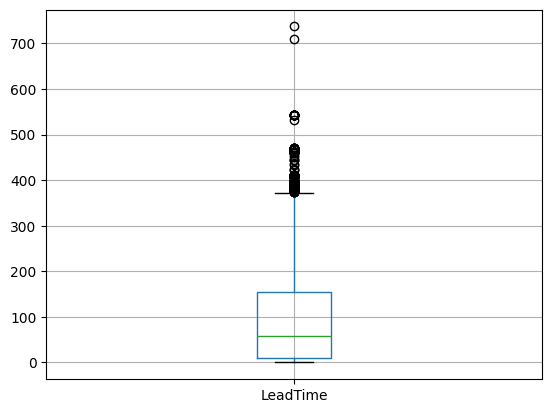

In [ ]:
df.boxplot("LeadTime")
df["LeadTime"].describe()

### ArrivalDateYear, ArrivalDateMonth, ArrivalDateDayOfMonth

We instantly notice that three columns ("ArrivalDateYear", "ArrivalDateMonth" and "ArrivalDateDayOfMonth") can be merged for the sake of simplicity of the dataset structure without losing any information. The new column will be named "ArrivalDate" and the data type will be datetime64 (format yyyy-mm-dd). Lastly, we have moved the new column in order to keep the original order of columns found in the initial dataset.

In [ ]:
#Create a dictionary to map month names to their numerical values.
month_map = {
    'January': '01', 'February': '02', 'March': '03', 'April': '04',
    'May': '05', 'June': '06', 'July': '07', 'August': '08',
    'September': '09', 'October': '10', 'November': '11', 'December': '12'
}

#Create a new column with the proper date format.
df['ArrivalDate'] = pd.to_datetime(
    df['ArrivalDateYear'].astype(str) + '-' +
    df['ArrivalDateMonth'].map(month_map) + '-' +
    df['ArrivalDateDayOfMonth'].astype(str).str.zfill(2)
)

#Get the columns to drop (the old date columns).
df = df.drop(["ArrivalDateYear"]+ ["ArrivalDateMonth"]+ ["ArrivalDateDayOfMonth"], axis=1)

#Move the new column in order to keep the original column order.
last_col = df.pop(df.columns[-1])  #Remove the last column.
df.insert(1, last_col.name, last_col)  #Insert it at position 1.

#Let's check the transformation.
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   LeadTime                     40060 non-null  int64         
 1   ArrivalDate                  40060 non-null  datetime64[ns]
 2   StaysInWeekendNights         40060 non-null  int64         
 3   StaysInWeekNights            40060 non-null  int64         
 4   MarketSegment                40060 non-null  object        
 5   DistributionChannel          40060 non-null  object        
 6   IsRepeatedGuest              40060 non-null  int64         
 7   PreviousCancellations        40060 non-null  int64         
 8   PreviousBookingsNotCanceled  40060 non-null  int64         
 9   ReservedRoomType             40060 non-null  object        
 10  BookingChanges               40060 non-null  int64         
 11  Agent                        31851 non-nu

,LeadTime,ArrivalDate,StaysInWeekendNights,StaysInWeekNights,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,79,2015-11-09,1,5,Offline TA/TO,TA/TO,0,0,0,E,0,314.0,NaN,0,Contract,56.16,0,1
1,49,2016-11-06,2,1,Online TA,TA/TO,0,0,0,A,6,240.0,NaN,0,Transient,64.80,0,3
2,292,2016-11-03,0,1,Groups,TA/TO,0,0,0,A,1,368.0,NaN,0,Transient-Party,38.00,0,1
3,121,2017-06-12,3,6,Online TA,TA/TO,0,0,0,G,0,240.0,NaN,0,Transient,180.00,0,4
4,4,2015-10-30,1,2,Online TA,TA/TO,0,0,0,A,0,240.0,NaN,0,Transient,48.00,0,1


### StaysInWeekNights, StaysInWeekendNights

"StaysInWeekNights" and "StaysInWeekendNights" respectively show the number of days spent at the hotel during the week and in the weekend. We think that the creation of another column "TotalStays" is good for improving tidiness and readability of the dataset. We do not drop the two original columns because we do not want to lose information.

In [ ]:
#Compute the sum of the two columns.
df["TotalStays"] = df["StaysInWeekendNights"] + df["StaysInWeekNights"]

#Move the new column in order to keep the original column order.
#Remove the last column.
last_col = df.pop(df.columns[-1])
#Insert it at position 1.
df.insert(2, last_col.name, last_col)

df.head(5)

,LeadTime,ArrivalDate,TotalStays,StaysInWeekendNights,StaysInWeekNights,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,79,2015-11-09,6,1,5,Offline TA/TO,TA/TO,0,0,0,E,0,314.0,NaN,0,Contract,56.16,0,1
1,49,2016-11-06,3,2,1,Online TA,TA/TO,0,0,0,A,6,240.0,NaN,0,Transient,64.80,0,3
2,292,2016-11-03,1,0,1,Groups,TA/TO,0,0,0,A,1,368.0,NaN,0,Transient-Party,38.00,0,1
3,121,2017-06-12,9,3,6,Online TA,TA/TO,0,0,0,G,0,240.0,NaN,0,Transient,180.00,0,4
4,4,2015-10-30,3,1,2,Online TA,TA/TO,0,0,0,A,0,240.0,NaN,0,Transient,48.00,0,1


We now check consistency of the two existing variables and of the newly created one: each observation's value for the three variables should be equal or greater than zero. Furthermore, it would be inconsistent to have 0 week nights and more than 2 weekend nights. The variables are consistent and do not contain absurd outliers, as shown below.

Negative values in StaysInWeekendNights: 0
Negative values in StaysInWeekNights: 0
Negative values in TotalStays: 0
Amount of observations with 0 TotalStays: 384
Wrong sequentiality: 0


,TotalStays
count,40060.000000
mean,4.318547
std,3.380273
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,69.000000


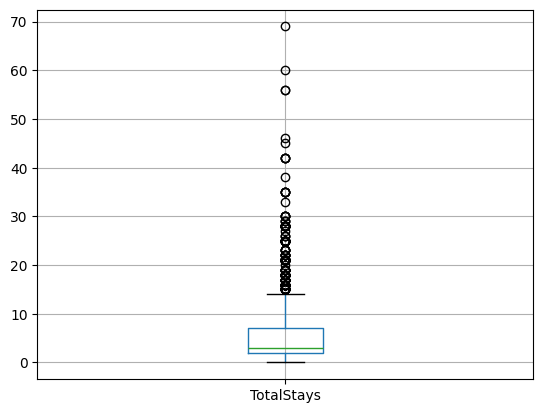

In [25]:
#Checking non-negativity.
count0 = (df["StaysInWeekendNights"] < 0)
count1 = (df["StaysInWeekNights"] < 0)
count2 = (df["TotalStays"] < 0)

count0 = count0.sum()
count1 = count1.sum()
count2 = count2.sum()

print("Negative values in StaysInWeekendNights:", count0)
print("Negative values in StaysInWeekNights:", count1)
print("Negative values in TotalStays:", count2)

#Checking amount of zero stays.
count3 = (df["TotalStays"] == 0)
count3 = count3.sum()
print("Amount of observations with 0 TotalStays:", count3)

#Checking right sequentiality of days.
count4 = ((df["StaysInWeekNights"]<=0) & (df["StaysInWeekendNights"]>2))
count4 = count4.sum()
print("Wrong sequentiality:", count4)

df.boxplot("TotalStays")
df["TotalStays"].describe()


### MarketSegment, DistributionChannel, ReservedRoomType, CustomerType

"MarketSegment", "DistributionChannel", "ReservedRoomType" and "CustomerType" columns are stored as object data types. We want to convert those columns to categorical variables, as categorical data allow faster processing and overall better performance in machine learning algorithms.

In [ ]:
#Convert columns to categorical variables.
df['MarketSegment'] = df['MarketSegment'].astype('category')
df['DistributionChannel'] = df['DistributionChannel'].astype('category')
df['ReservedRoomType'] = df['ReservedRoomType'].astype('category')
df['CustomerType'] = df['CustomerType'].astype('category')

#Print category counts.

print("MarketSegment counts:")
print(df['MarketSegment'].value_counts())
print("\nDistributionChannel counts:")
print(df['DistributionChannel'].value_counts())
print("\nReservedRoomType counts:")
print(df['ReservedRoomType'].value_counts())
print("\nCustomerType counts:")
print(df['CustomerType'].value_counts())

MarketSegment counts:
MarketSegment
Online TA        17729
Offline TA/TO     7472
Direct            6513
Groups            5836
Corporate         2309
Complementary      201
Name: count, dtype: int64

DistributionChannel counts:
DistributionChannel
TA/TO        28925
Direct        7865
Corporate     3269
Undefined        1
Name: count, dtype: int64

ReservedRoomType counts:
ReservedRoomType
A    23399
D     7433
E     4982
G     1610
F     1106
C      918
H      601
L        6
B        3
P        2
Name: count, dtype: int64

CustomerType counts:
CustomerType
Transient          30209
Transient-Party     7791
Contract            1776
Group                284
Name: count, dtype: int64


No problem about formatting/capitalization in these variables have popped up. We can notice that in the variable "DistributionChannel" there is 1 observation that has a different category (Undefined), which could be interpreted as missing data.

Furthermore, it can be seen that room types L, B and P respectively have 6, 3 and 2 occurrencies, a really small amount compared to the relatively large amount of observations. While the count of those room types may be valid, there is also a possibility of them being entry errors in the dataset.

### IsRepeatedGuest


"IsRepeatedGuest" has the wrong data type as it is int64. We want to change it to a boolean variable. For the sake of readability we have changed 1 in "True" and 0 in "False". No further problems here.

In [ ]:
df['IsRepeatedGuest'] = df['IsRepeatedGuest'].astype(bool)

#Verify the change.
print(df['IsRepeatedGuest'].head())

#Count the number of True and False values in IsRepeatedGuest.
repeated_guest_counts = df['IsRepeatedGuest'].value_counts()

#Print the result.
print("\nIsRepeatedGuest counts:")
print(repeated_guest_counts)



0    False
1    False
2    False
3    False
4    False
Name: IsRepeatedGuest, dtype: bool

IsRepeatedGuest counts:
IsRepeatedGuest
False    38282
True      1778
Name: count, dtype: int64


### PreviousCancellations, PreviousBookingsNotCanceled, BookingChanges, DaysInWaitingList, RequiredCarParkingSpaces, TotalOfSpecialRequests



These six variables are tidy.

Reasoning about data quality, they rightfully are of the integer type and contain no negative values.
Outliers are present in all of these variables, especially for variable "PreviousCancellations", where observations of 24, 25 and 26 observations are strangely high, and for variable "RequiredCarParkingSpaces", where there are 2 observations of value 8.

Count of each PreviousCancellations value:
PreviousCancellations
0     38965
1       896
24       48
2        44
26       26
25       25
19       19
14       14
3        14
4         6
5         3
Name: count, dtype: int64


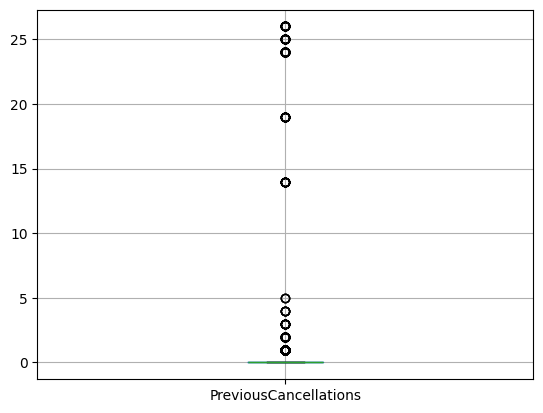

In [ ]:
df.boxplot("PreviousCancellations")
df["PreviousCancellations"].describe()

#Count each value in PreviousCancellations.
PreviousCancellations = df['PreviousCancellations'].value_counts()

#Print the counts.
print("Count of each PreviousCancellations value:")
print(PreviousCancellations)


,PreviousBookingsNotCanceled
count,40060.000000
mean,0.146455
std,1.001955
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,30.000000


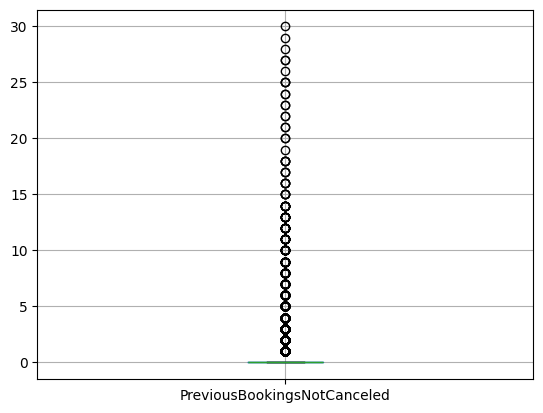

In [ ]:
df.boxplot("PreviousBookingsNotCanceled")
df["PreviousBookingsNotCanceled"].describe()

,BookingChanges
count,40060.000000
mean,0.287968
std,0.726548
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,17.000000


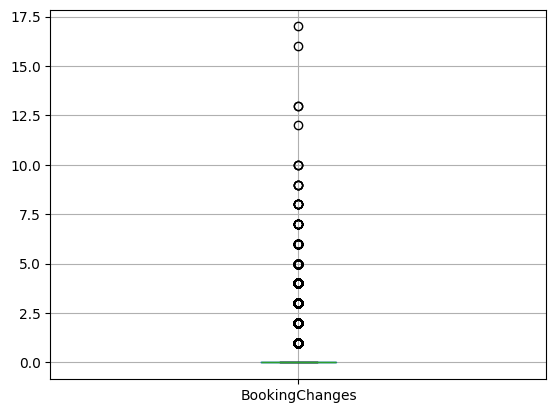

In [ ]:
df.boxplot("BookingChanges")
df["BookingChanges"].describe()

,DaysInWaitingList
count,40060.000000
mean,0.527758
std,7.428580
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,185.000000


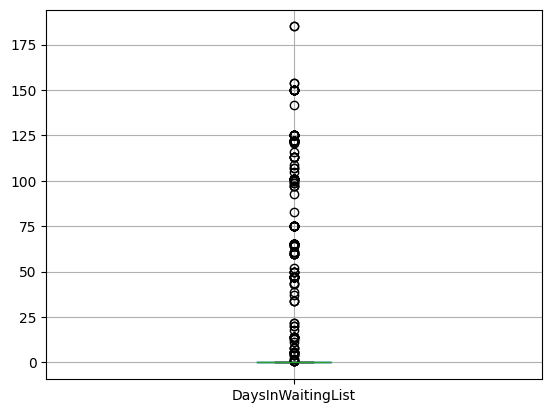

In [ ]:
df.boxplot("DaysInWaitingList")
df["DaysInWaitingList"].describe()

Count of each RequiredCarParkingSpaces value:
RequiredCarParkingSpaces
0    34570
1     5462
2       25
8        2
3        1
Name: count, dtype: int64


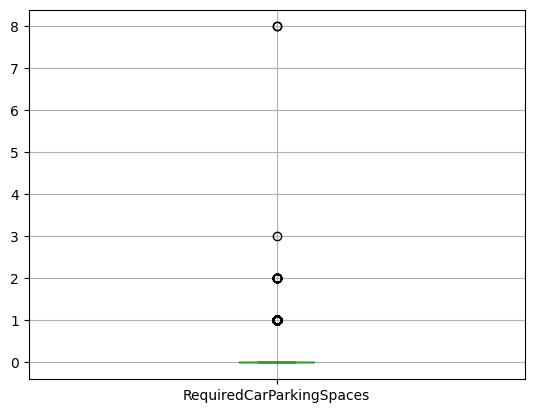

In [ ]:
df.boxplot("RequiredCarParkingSpaces")
df["RequiredCarParkingSpaces"].describe()

#Count each value in RequiredCarParkingSpaces.
parking_space_counts = df['RequiredCarParkingSpaces'].value_counts()

#Print the counts.
print("Count of each RequiredCarParkingSpaces value:")
print(parking_space_counts)

,TotalOfSpecialRequests
count,40060.00000
mean,0.61977
std,0.81393
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,5.00000


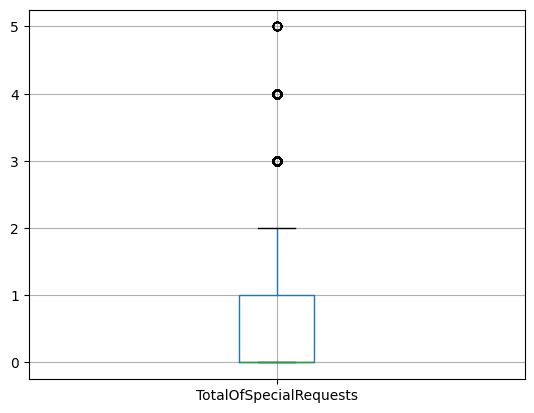

In [ ]:
df.boxplot("TotalOfSpecialRequests")
df["TotalOfSpecialRequests"].describe()


### Agent, Company

The variables "Agent" and "Company" show the ID of the booking and paying company respectively. "Agent" and "Company" are stored as float64. We want to change the data type to integer while keeping the missing values, that will be NAs (Not Applicable), we therefore use pandas' nullable type Int64. We also want to rename columns to make the names more explicative of what the variable registers. We choose to change "Agent" to "BookingTravelAgencyID" and "Company" to "PayingCompanyID".

In [ ]:
df['Agent'] = pd.to_numeric(df['Agent'], errors='coerce').astype('Int64')
df['Company'] = pd.to_numeric(df['Company'], errors='coerce').astype('Int64')

df = df.rename(columns={'Agent': 'BookingTravelAgencyID'})
df = df.rename(columns={'Company': 'PayingCompanyID'})

As shown below, a high percentage of observations have missing value in the newly named variable "BookingTravelAgencyID" and an even higher one in the variable "PayingCompanyID".
Missing "BookingTravelAgencyID" values likely indicate that the booking was made without a travel agency, such as directly through the hotel’s website or in person.
Missing "PayingCompanyID" values suggest that the booking was not associated with a company, implying it was likely made for personal or individual travel rather than corporate or business purposes.

In [ ]:
# Count missing values.
missing_counts = df[['BookingTravelAgencyID', 'PayingCompanyID']].isnull().sum()

# Calculate proportion of missing values.
missing_proportions = df[['BookingTravelAgencyID', 'PayingCompanyID']].isnull().mean()

# Combine into a DataFrame for better readability.
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Proportion': missing_proportions
})

print(missing_summary)

                       Missing Count  Missing Proportion
BookingTravelAgencyID           8209            0.204918
PayingCompanyID                36952            0.922416


In addition, we want to check the relation between NAs in "BookingTravelAgencyID" and "PayingCompanyID".
Below, we can see that the majority of observation has missing value in 1 or another observation. While 5271 observations out of 40060 have NA for both variables. A negligible percentage has both the IDs recorded.

In [ ]:
NA_1orAnother = ((df['BookingTravelAgencyID'].isna()) & (df['PayingCompanyID'].notna())) | ((df['BookingTravelAgencyID'].notna()) & (df['PayingCompanyID'].isna()))
print(NA_1orAnother.sum())

bothNA = ((df['BookingTravelAgencyID'].isna()) & (df['PayingCompanyID'].isna()))
print(bothNA.sum())

both_notNA = ((df['BookingTravelAgencyID'].notna()) & (df['PayingCompanyID'].notna()))
print(both_notNA.sum())


34619
5271
170


### ADR

We can quite confidently say "ADR" has some entry errors. While 384 out of the 751 observations having an "ADR" equal to 0 may be justified by the number of days booked being equal to 0, the remaining 367 observations have one or more days booked, which makes it very unlikely for the observations to have an "ADR" of value 0. Furthermore, there is a negative value for this variable, which should realistically not be possible. .

Negative ADRs: 1
Total Zero ADRs: 751
Zero ADRs with no stays: 384
Zero ADRs with stays: 367


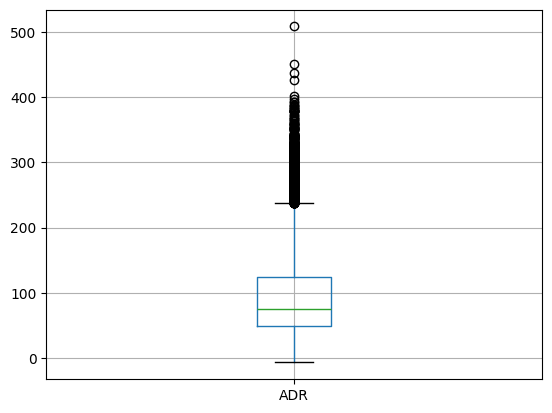

In [ ]:
df.boxplot("ADR")
df["ADR"].describe()
print("Negative ADRs:", (df['ADR'] < 0).sum())
print("Total Zero ADRs:", (df["ADR"] == 0).sum())
print("Zero ADRs with no stays:", ((df["TotalStays"]==0) & (df["ADR"]<=0)).sum())
print("Zero ADRs with stays:", ((df['ADR'] == 0) & (df['TotalStays'] > 0)).sum())


## Dealing with duplicate rows

As shown by the code below, the dataset contains 7186 duplicate rows. These could be exact duplicate bookings or data entry repetition. While we do not remove them in this assignment (to avoid modifying the dataset), they may need attention in a future cleaning step.

In [ ]:
duplicates = df.duplicated()

#See how many duplicates.
print("Number of duplicate rows:", duplicates.sum())

#Find duplicated rows (excluding first).
duplicates = df[df.duplicated()]

#Find all rows that are part of a duplicated group (including first).
duplicated_all = df[df.duplicated(keep=False)]

#Sort to bring duplicates together.
duplicated_all_sorted = duplicated_all.sort_values(by=list(df.columns))

#View.
duplicated_all_sorted.head(6)

Number of duplicate rows: 7186


,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
2738,0,2015,August,14,0,1,Online TA,TA/TO,0,0,0,D,0,240.0,NaN,0,Transient-Party,172.0,0,2
35059,0,2015,August,14,0,1,Online TA,TA/TO,0,0,0,D,0,240.0,NaN,0,Transient-Party,172.0,0,2
7722,0,2015,August,24,1,0,Direct,Direct,0,0,0,A,0,NaN,NaN,0,Transient,153.0,0,0
25136,0,2015,August,24,1,0,Direct,Direct,0,0,0,A,0,NaN,NaN,0,Transient,153.0,0,0
9599,0,2015,December,3,0,1,Direct,Direct,0,0,0,A,0,NaN,NaN,0,Transient,38.0,0,0
14335,0,2015,December,3,0,1,Direct,Direct,0,0,0,A,0,NaN,NaN,0,Transient,38.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   LeadTime                     40060 non-null  int64         
 1   ArrivalDate                  40060 non-null  datetime64[ns]
 2   TotalStays                   40060 non-null  int64         
 3   StaysInWeekendNights         40060 non-null  int64         
 4   StaysInWeekNights            40060 non-null  int64         
 5   MarketSegment                40060 non-null  category      
 6   DistributionChannel          40060 non-null  category      
 7   IsRepeatedGuest              40060 non-null  bool          
 8   PreviousCancellations        40060 non-null  int64         
 9   PreviousBookingsNotCanceled  40060 non-null  int64         
 10  ReservedRoomType             40060 non-null  category      
 11  BookingChanges               40060 non-nu

# Final tidy dataset

In [ ]:
df.to_csv("tidy_dataset_Data_Doctors.csv", index=False)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Extra: If running in Google Colab.
try:
    from google.colab import files
    files.download("tidy_dataset_Data_Doctors.csv")
except ImportError:
    print("Not running on Google Colab — download manually if needed.")